# CREDIT CARD CUSTOMER SEGMENTATION

### ALLIFE CREDIT CARD CUSTOMER SEGMENTATION
**Background:** AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

**Objective**: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

**Key Questions:**

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?
 

**Data Description:** Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

* Customer key - Identifier for the customer
* Average Credit Limit - Average credit limit across all the credit cards
* Total credit cards - Total number of credit cards
* Total visits bank - Total number of bank visits
* Total visits online - total number of online visits
* Total calls made - Total number of calls made by the customer 

### IMPORT LIBRARIES

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### LOAD DATA

In [2]:
data = pd.read_excel('Credit Card Customer Data.xlsx',index_col ='Sl_No')
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


In [3]:
print (data.shape)
print (data.shape[0],'rows',data.shape[1],'columns')

(660, 6)
660 rows 6 columns


In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


<span style= font-size:1.5;> 
<font color=darkblue>
As noticed, all attributes are numerical.

## 1. EXPLORATORY DATA ANALYSIS (EDA)
### UNIVARIATE ANALSYSIS:
<span style= font-size:1.5;> 
<font color=darkblue>
Checking datatypes, missing values, statisctical summary, variable distributions, duplicates and outliers

In [5]:
# Data types
data.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [6]:
# checking null values
data.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# Checking missing values
data.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<span style= font-size:1.5;> 
<font color=darkblue>
There are not null nor missing values in the dataset

In [8]:
# Checking duplicate customers
data['Customer Key'].nunique()

655

In [9]:
duplicate_customers = data[data['Customer Key'].duplicated(keep=False)]
print ('there are',duplicate_customers.shape[0]/2,'duplicate customers keys in the data set')
display (duplicate_customers)

there are 5.0 duplicate customers keys in the data set


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
49,37252,6000,4,0,2,8
105,97935,17000,2,1,2,10
333,47437,17000,7,3,1,0
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2
412,50706,44000,4,5,0,2
433,37252,59000,6,2,1,2
542,50706,60000,7,5,2,2


<span style= font-size:1.5;> 
<font color=darkblue>
Although there are duplicate customers keys, based on the additional information given in the other attributes, it is observed that, in fact they have different spending (credit limits) and patterns of interaction with the bank, so it is possible to consider that these customers may have different accounts in the same bank, something that could be considered normal.

In [10]:
# Statistical summary
data.drop('Customer Key',axis=1).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.24,37625.49,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.71,2.17,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.40,1.63,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.61,2.94,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.58,2.87,0.0,1.0,3.0,5.0,10.0


### VARIABLE DISTRIBUTIONS

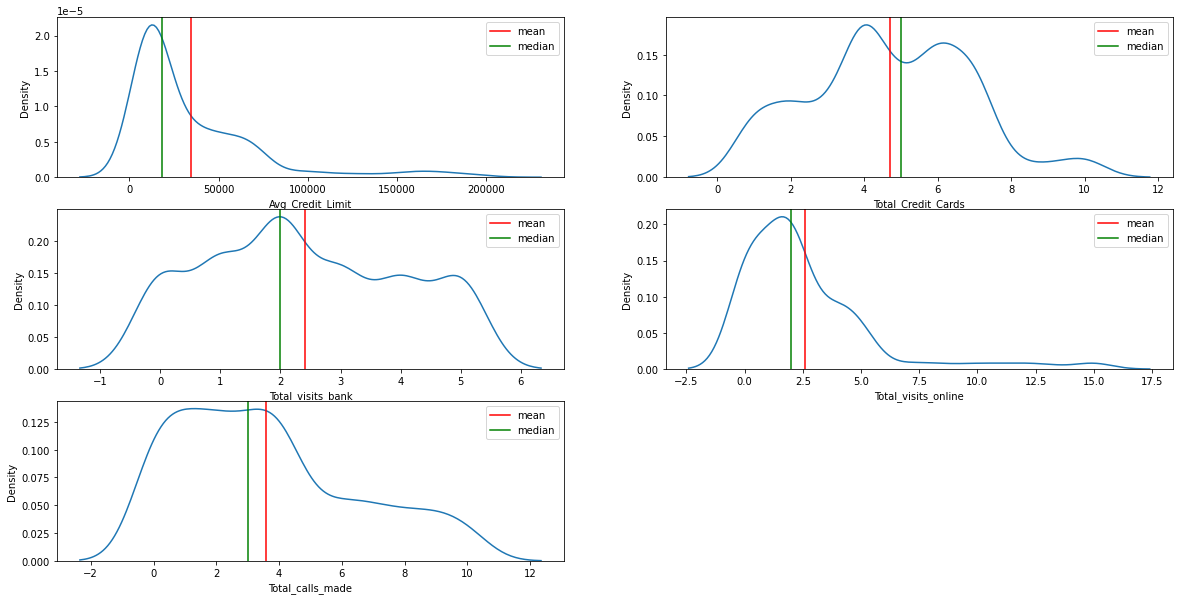

In [11]:
# Displots
plt.figure(figsize= (20,10))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']:
    plt.subplot(3, 2, pos)
    sns.distplot(data[i],hist=False,kde=True)
    plt.axvline(data[i].mean(),color='r',label= 'mean')
    plt.axvline(data[i].median(),color='g',label= 'median')
    plt.legend()
    pos+= 1    

In [12]:
# Measures of Skewness and Kurtosis

stat_columns = ['Variable','Skewness','Kurtosis']
stat_compare = pd.DataFrame(columns= stat_columns)
row_index = 1

for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']: 
    stat_compare.loc[row_index,'Variable'] = i
    stat_compare.loc[row_index,'Skewness'] = data[i].skew().round(2)
    stat_compare.loc[row_index,'Kurtosis'] = data[i].kurt().round(2)
    row_index += 1
    
display(stat_compare)

,Variable,Skewness,Kurtosis
1,Avg_Credit_Limit,2.2,5.13
2,Total_Credit_Cards,0.14,-0.37
3,Total_visits_bank,0.14,-1.1
4,Total_visits_online,2.23,5.74
5,Total_calls_made,0.66,-0.52


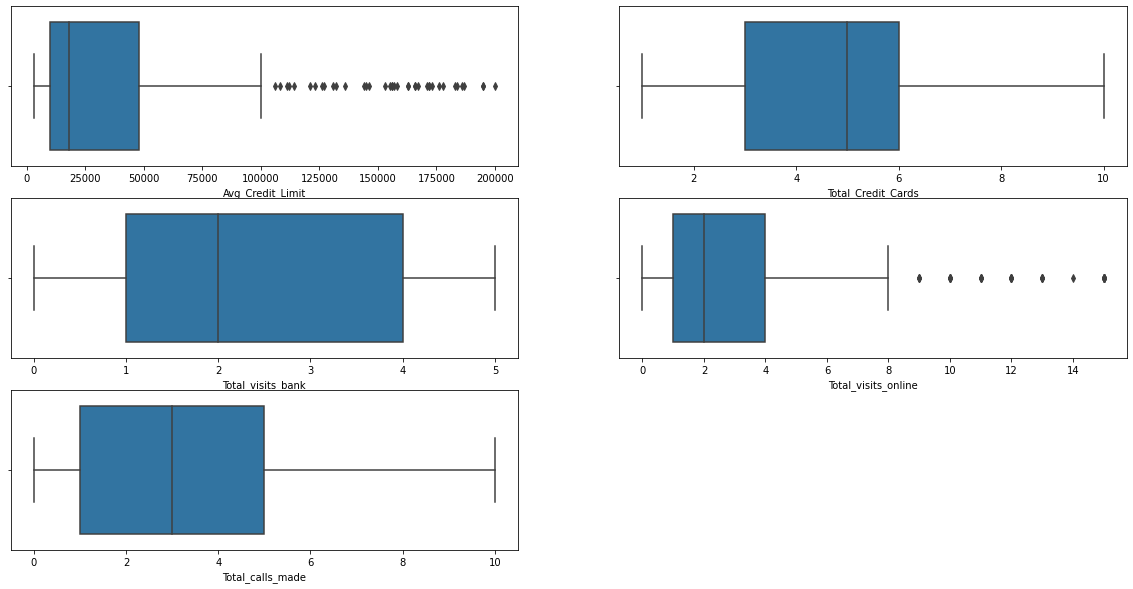

In [13]:
# Boxplots
plt.figure(figsize= (20,10))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']:
    plt.subplot(3, 2, pos)
    sns.boxplot(data[i])
    pos+= 1

<span style= font-size:3.5;> 
<font color=darkblue>
**INSIGHTS - UNIVARIATE ANALYSIS**

<span style= font-size:1.5;> 
<font color=darkblue>
* As observed, **'Avg_Credit_Limit'** and **'Total_visits_online'** attributes show skewed distributions. Both variables have high kurtosis index, meaning their distribution are heavy-tailed (presence of outliers) relative to a normal distribution. 

* None of the attributes clearly show a normal distribution. Different peaks in their density function are observed (specially **'Total_Credit_card'** varible), which can be interpreted as local maximums that must be taken into account to estimate the amount of clusters that could be generated.

* There is a significant difference between the magnitudes and scales of the different variables. As most distance measures used in clustering models are highly influenced by scale of each variable, these have to be converted to the same scale.

### OUTLIERS
<span style= font-size:1.5;> 
<font color=darkblue>
By calculating the z-score for each of data point in continuous attributes and setting a thereshold of 3, if the z-score is greater than 3 (which means that data point falls outside of 3 standard deviations), then we can classify that point as an outlier.

In [14]:
from scipy import stats

# Finding outliers in Avg_Credit_Limit column
Avg_Credit_Limit_z = pd.DataFrame({'zscore':np.abs(stats.zscore(data.Avg_Credit_Limit))})
Avg_Credit_Limit_outliers = Avg_Credit_Limit_z.index[Avg_Credit_Limit_z.zscore>3].tolist()
print('there are',len(Avg_Credit_Limit_outliers),'points in Avg_Credit_Limit column that may be considered as outliers')
Avg_Credit_Limit_outliers_df = pd.DataFrame(data.iloc[Avg_Credit_Limit_outliers]['Avg_Credit_Limit'])
display(Avg_Credit_Limit_outliers_df)

there are 24 points in Avg_Credit_Limit column that may be considered as outliers


,Avg_Credit_Limit
Sl_No,
613,157000
615,163000
620,158000
622,166000
623,176000
624,166000
625,178000
627,156000
630,155000


In [15]:
# Finding outliers in Total_visits_online column
Total_visits_online_z = pd.DataFrame({'zscore':np.abs(stats.zscore(data.Total_visits_online))})
Total_visits_online_outliers = Total_visits_online_z.index[Total_visits_online_z.zscore>3].tolist()
print('there are',len(Total_visits_online_outliers),'points in Total_visits_online column that may be considered as outliers')
Total_visits_online_outliers_df = pd.DataFrame(data.iloc[Total_visits_online_outliers]['Total_visits_online'])
display(Total_visits_online_outliers_df)

there are 22 points in Total_visits_online column that may be considered as outliers


,Total_visits_online
Sl_No,
5,12
613,14
618,13
619,13
620,13
621,15
622,12
623,15
628,12


In [16]:
common_outliers_rows = Avg_Credit_Limit_outliers_df.index.isin(Total_visits_online_outliers_df.index).sum()
print('There are',common_outliers_rows,'common outliers rows between Avg_Credit_Limit and Total_visits_online columns')

There are 11 common outliers rows between Avg_Credit_Limit and Total_visits_online columns


<span style= font-size:1.5;> 
<font color=darkblue>
Both attributes **Avg_Credit_Limit** and **Total_visits_online** share a high percentage (around 50%) of the same rows considered as outliers, which could be related to a common behavior pattern for both variables. In addition, although clustering algorithms used for unsupervised learning are sensitive to outliers, in this particular case, as the data is refered to banking (in which skewed distributions is somehow expected and considered normal), we decided not to treat the outliers and determine if these points can actually be part of a unique cluster.

### BIVARIATE ANALSYSIS

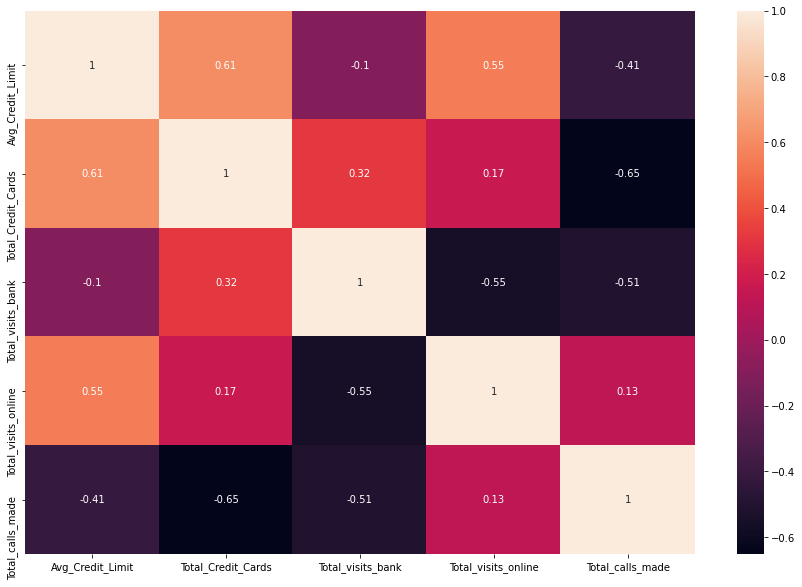

In [17]:
corr = data.drop('Customer Key',axis=1).corr()
plt.figure(figsize= (15,10))
sns.heatmap(corr, annot = True);

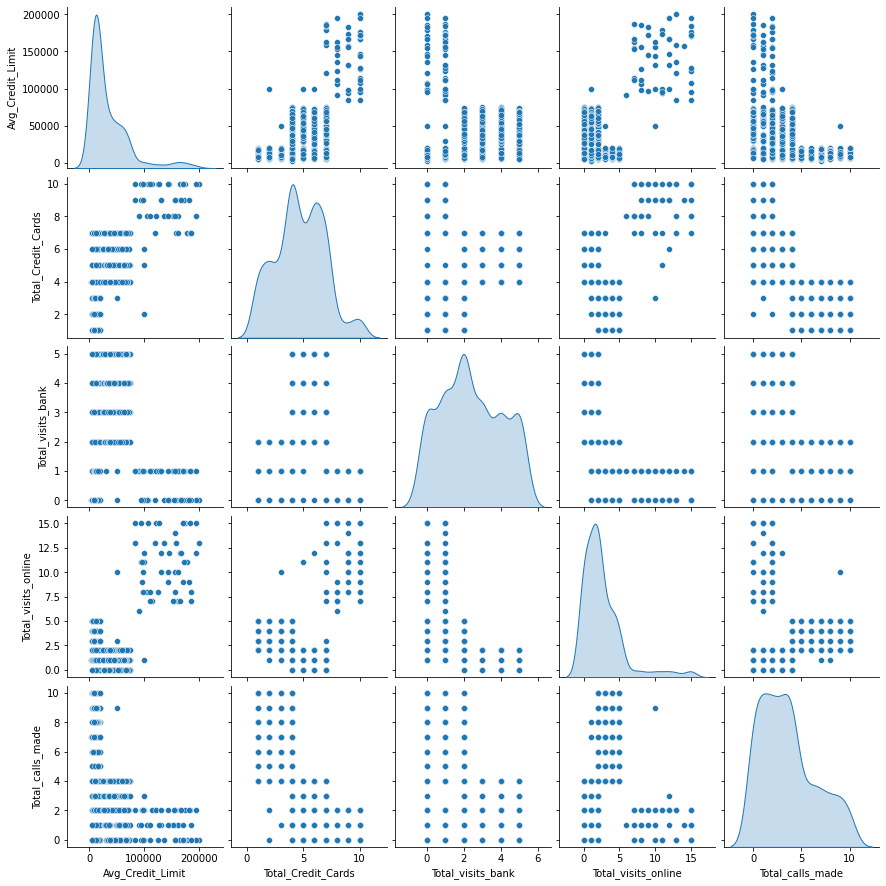

In [18]:
sns.pairplot(data.drop('Customer Key',axis=1), diag_kind='kde');

<span style= font-size:3.5;> 
<font color=darkblue>
**INSIGHTS - BIVARIATE ANALYSIS**

<span style= font-size:1.5;> 
<font color=darkblue>
* From Heatmap above, it is observed a significant positive correlation **(0.61)** between attributes **'Avg_Credit_Limit'** and **'Total_Credit_card'**, which is somehow expected. In this sense, scatterplots show a possitive association between these two variables also. In the other hand, **'Total_Credit_card'** and **'Total_calls_made'** show significant negative correlation **(-0.65)**.
    
* It is also observed some important positive correlation **(0.55)** between **'Avg_Credit_Limit'** and **'Total_visits_online'**. In addition scatterplot show a possitive association between these two variables as well. 
    
* For visual analysis of clustering, by looking at the marginal desinty function of each attribute shown in the diagonal of pairplot, we can have an idea of the range of values that K (number of clusters) should be evaluted in. In this case, we can indetifying attributes like **Total_Credit_card** which clearly demarcates at least 3 different clusters.

## 2. PREPARING DATA FOR CLUSTERING MODELS

In [19]:
# Data scaling
datascaled=data.drop('Customer Key',axis=1).apply(zscore)
datascaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
2,0.410293,-0.787585,-1.473731,2.520519,1.891859
3,0.410293,1.058973,-0.860451,0.134290,0.145528
4,-0.121665,0.135694,-0.860451,-0.547490,0.145528
5,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [20]:
# Statistical summary
datascaled.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,0.0,1.0,-0.84,-0.65,-0.44,0.36,4.40
Total_Credit_Cards,660.0,0.0,1.0,-1.71,-0.79,0.14,0.60,2.44
Total_visits_bank,660.0,-0.0,1.0,-1.47,-0.86,-0.25,0.98,1.59
Total_visits_online,660.0,0.0,1.0,-0.89,-0.55,-0.21,0.48,4.22
Total_calls_made,660.0,-0.0,1.0,-1.25,-0.90,-0.20,0.49,2.24


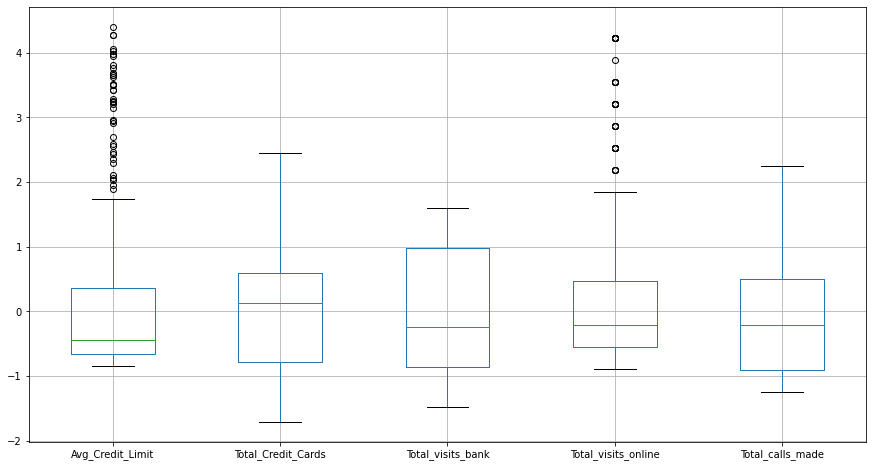

In [21]:
# Visualizing data after scaling
plt.figure(figsize= (15,8))
datascaled.boxplot();

## 3. K MEANS CLUSTERING

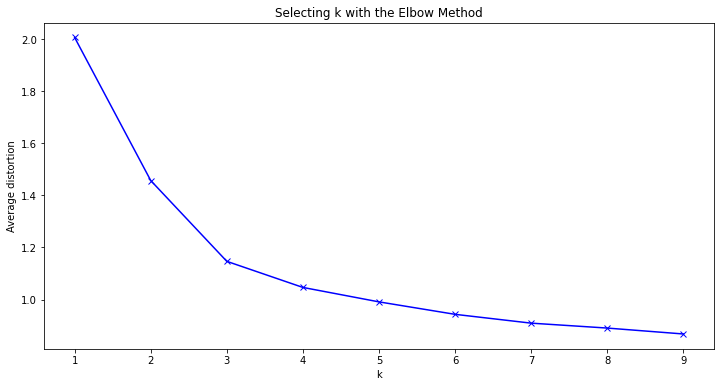

In [22]:
# We will use K-Means clustering to group data based on their attribute, but First, 
# we need to determine the optimal number of groups

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(datascaled)
    prediction=model.predict(datascaled)
    meanDistortions.append(sum(np.min(cdist(datascaled, model.cluster_centers_, 'euclidean'), axis=1)) / datascaled.shape[0])

plt.figure(figsize= (12,6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

<span style= font-size:1.5;> 
<font color=darkblue>
Based on the **'elbow' method**, it is noticed that  the Avarage distortion index starts changing its rate of reduction when the number of clusters is **3**, suggesting this as a suitable number of clusters for this case.

In [23]:
# Checking silhouette_score of K-means clustering for a range of values of K
from sklearn.metrics import silhouette_score

for j in range(2,10):
    model= KMeans(n_clusters=j)
    model.fit(datascaled)
    model_silhouette_score=silhouette_score(datascaled,model.labels_).round(3)
    print (' For K=',j, 'Silhouette Score ---->',model_silhouette_score)

 For K= 2 Silhouette Score ----> 0.418
 For K= 3 Silhouette Score ----> 0.516
 For K= 4 Silhouette Score ----> 0.356
 For K= 5 Silhouette Score ----> 0.273
 For K= 6 Silhouette Score ----> 0.255
 For K= 7 Silhouette Score ----> 0.25
 For K= 8 Silhouette Score ----> 0.227
 For K= 9 Silhouette Score ----> 0.219


<span style= font-size:1.5;> 
<font color=darkblue>
Based on the **Average Silhouette Coefficient**, once again **3 clusters** seem to be the most suitable approach.

In [24]:
#Set the value of k= 3
kmeans = KMeans(n_clusters=3,n_init =15,random_state=85)
kmeans.fit(datascaled)

KMeans(n_clusters=3, n_init=15, random_state=85)

In [25]:
centroids = kmeans.cluster_centers_
display(centroids)

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [26]:
# Creating a new dataframe only for labels and converting it into categorical variable
data_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
data_labels.index = data_labels.index+1
data_labels['labels'] = data_labels['labels'].astype('category')
display (data_labels)

,labels
1,0
2,1
3,0
4,0
5,2
...,...
656,2
657,2
658,2
659,2


In [27]:
# Joining the label dataframe with the original dataframe (appending the prediction)
data_labeled = data.join(data_labels)
datascaled_labeled = datascaled.join(data_labels)
print("Groups Assigned : \n")
display (data_labeled)

Groups Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
Sl_No,,,,,,,
1,87073,100000,2,1,1,0,0
2,38414,50000,3,0,10,9,1
3,17341,50000,7,1,3,4,0
4,40496,30000,5,1,1,4,0
5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
656,51108,99000,10,1,10,0,2
657,60732,84000,10,1,13,2,2
658,53834,145000,8,1,9,1,2


### ANALYZING THE DISTRIBUTION OF THE DATA AMONG THE CLUSTERS (K = 3)

0    386
1    224
2     50
Name: labels, dtype: int64


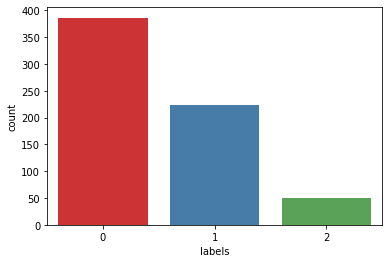

In [28]:
sns.countplot(data_labeled['labels'],palette='Set1');
print(data_labeled['labels'].value_counts())

In [29]:
data_clust = data_labeled.drop('Customer Key',axis=1).groupby(['labels'])
data_clust.mean().round()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33782.0,6.0,3.0,1.0,2.0
1,12174.0,2.0,1.0,4.0,7.0
2,141040.0,9.0,1.0,11.0,1.0


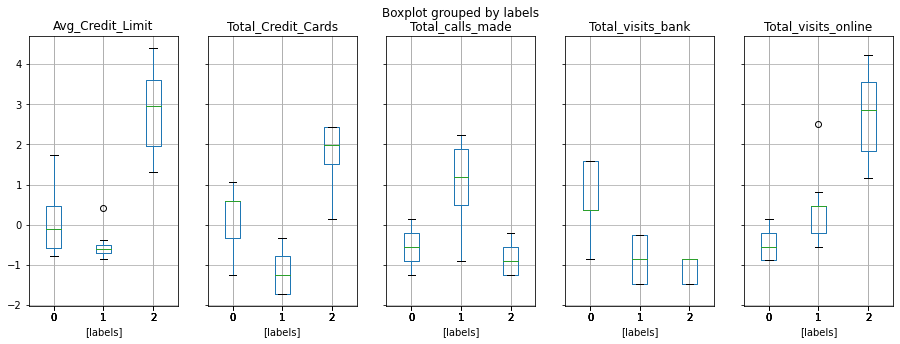

In [30]:
datascaled_labeled.boxplot(by='labels', layout = (1,5),figsize=(15,5));

<span style= font-size:3.5;> 
<font color=darkblue>
**INSIGHTS**

* Boxplots show well differentiated clusters between each of the attributes. 

* For **'Avg_Credit_limit'**, it is observed that the largest number of customers (group labeled 2) has a mean credit limit around 33782, which is quite close to the mean of the entire distribution of this variable (34574). On the other hand, it is observed that the cluster with the fewest observations (group labeled 1) corresponds to customers with the highest credit limit. This behavior is repeated for **'Total_Credit_Cards'** attribute (which is expected by the correlation that exists between these two variables).

* Cluster of customers with the lowest credit limit (group labeled 0) tends to receive more phone calls, while the cluster with the highest credit limit (group labeled 1) prefers online visits.

* The cluster with the highest number of observations (group labeled 2) prefers to visit the bank and  on average, uses the least online visits.

## 4. HIERARCHICAL CLUSTERING

### EXECUTING HIERARCHICAL CLUSTERING WITH DIFFERENT LINKAGE METHODS

Linkage method: single


array([[4.64000000e+02, 4.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.25000000e+02, 4.55000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 1.62000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [0.00000000e+00, 1.30000000e+03, 1.36611611e+00, 6.09000000e+02],
       [1.31500000e+03, 1.31600000e+03, 1.70672464e+00, 6.59000000e+02],
       [1.00000000e+00, 1.31700000e+03, 1.92949629e+00, 6.60000000e+02]])

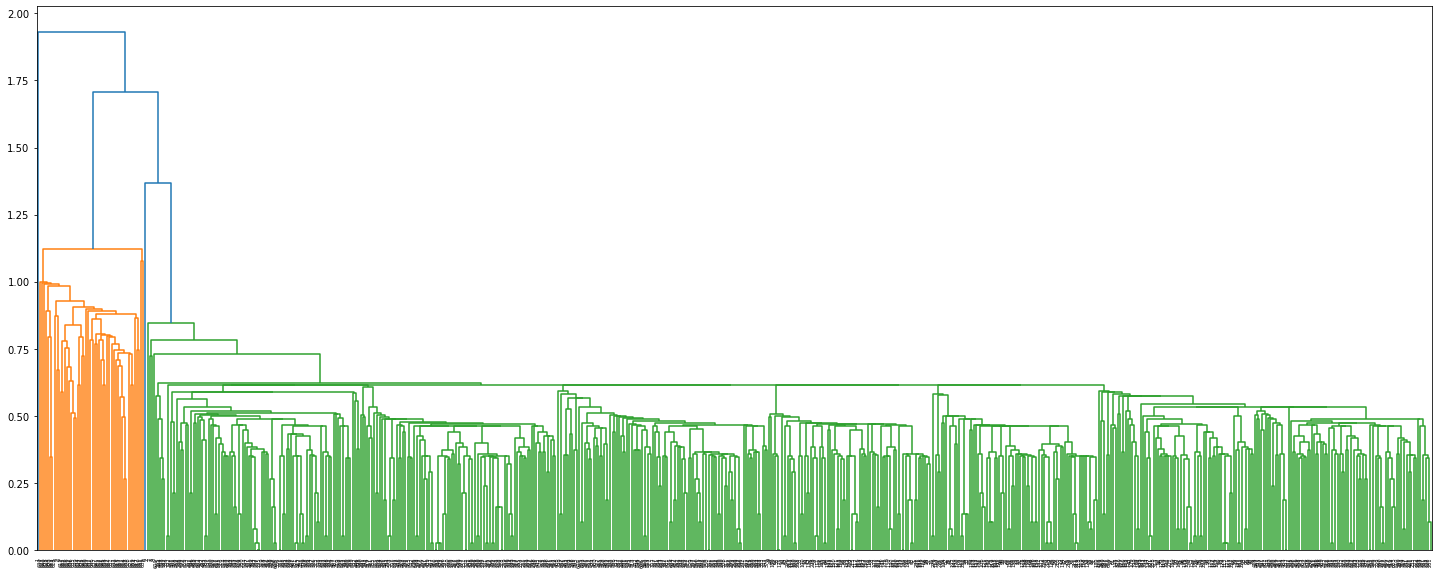

Linkage method: complete


array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       [ 320.        ,  378.        ,    0.        ,    2.        ],
       ...,
       [1309.        , 1314.        ,    4.3347102 ,  397.        ],
       [1313.        , 1316.        ,    5.95846764,  610.        ],
       [1315.        , 1317.        ,    8.44853628,  660.        ]])

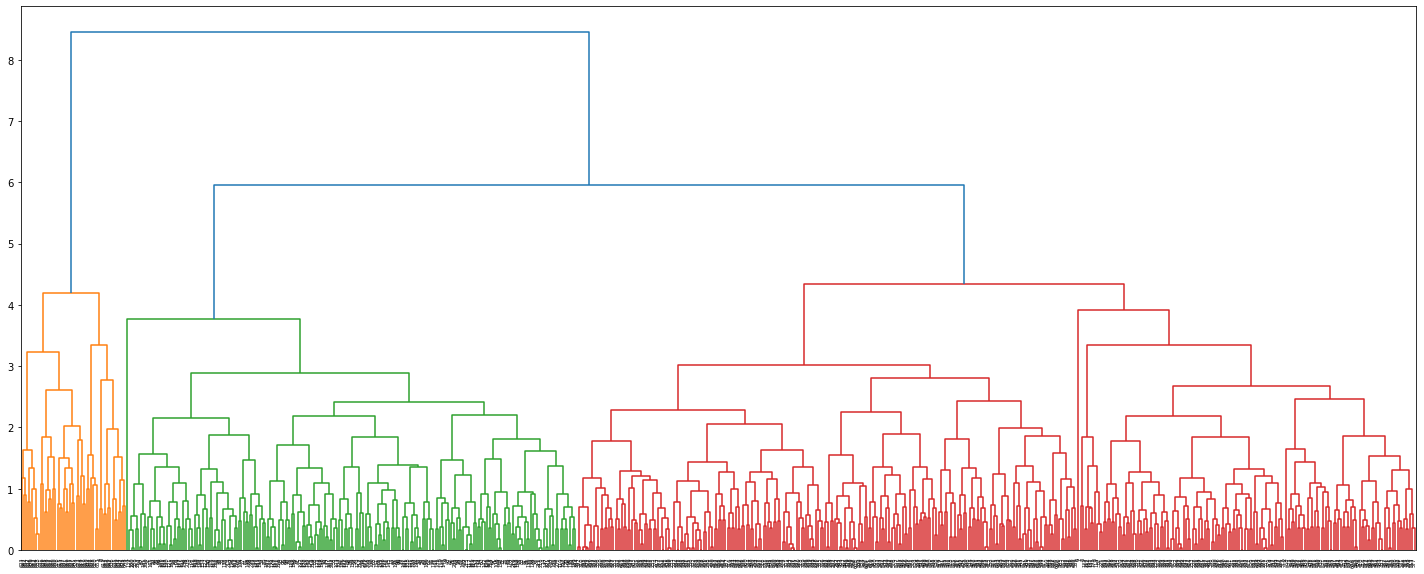

Linkage method: average


array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       [ 252.        ,  324.        ,    0.        ,    2.        ],
       ...,
       [   0.        , 1309.        ,    3.11135778,  387.        ],
       [1315.        , 1316.        ,    3.25253923,  610.        ],
       [1314.        , 1317.        ,    5.45418035,  660.        ]])

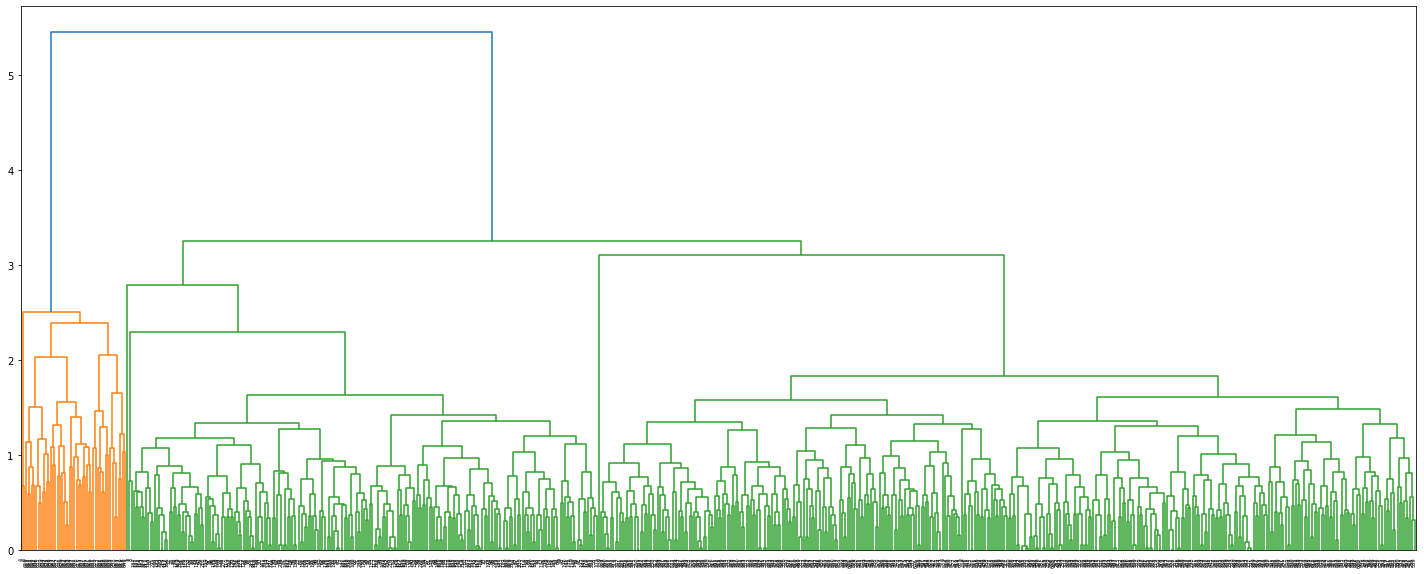

Linkage method: ward


array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

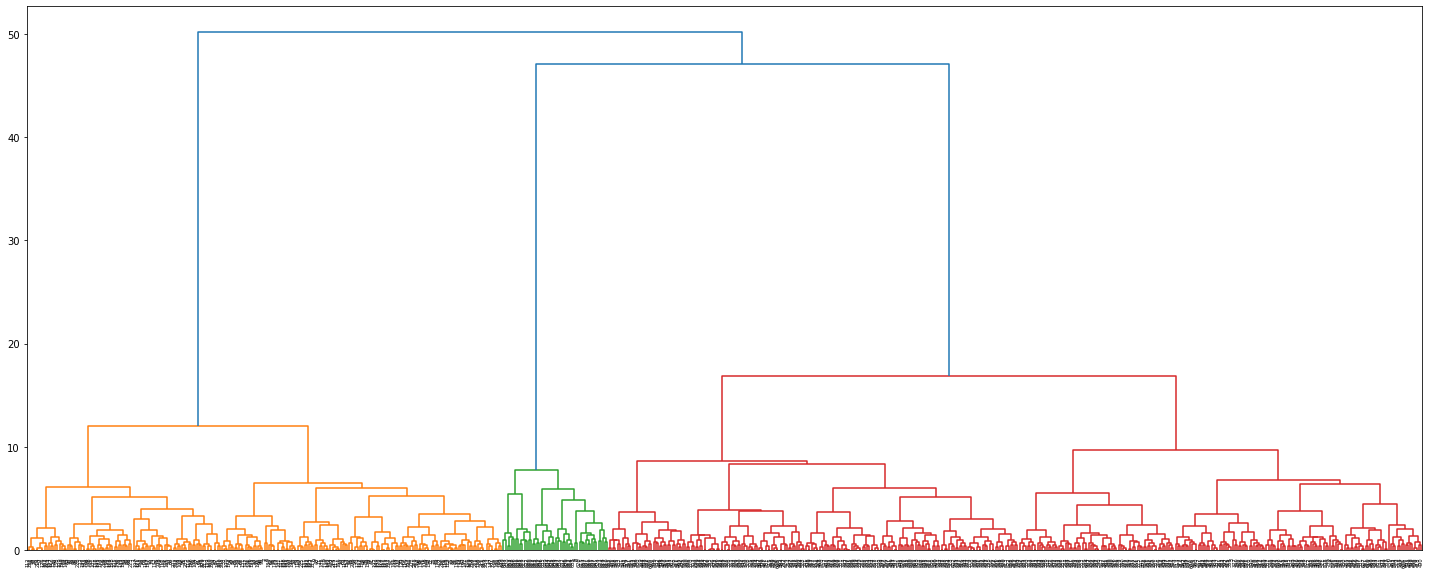

In [31]:
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
# Linkage matrix & dendrogram
for i in ['single','complete','average','ward']:
    Z = linkage(datascaled,method=i, metric='euclidean')
    print ('Linkage method:',i)
    display(Z[:])
    plt.figure(figsize=(25, 10))
    dendrogram(Z)
    plt.show()   

In [32]:
# Comparison between hierarchical clustering using different likange methods based on cophenet index
from scipy.spatial.distance import pdist #Pairwise distribution between data points
df_columns = ['Linkage','cophenet index']
df_compare = pd.DataFrame(columns=df_columns)
row_index = 0
# Creating loop for metrics
for i in ['single','complete','average','weighted','centroid','ward']:
    Z = linkage(datascaled,method=i, metric='euclidean')
    c, coph_dists = cophenet(Z , pdist(datascaled))
    df_compare.loc[row_index,'Linkage'] = i
    df_compare.loc[row_index,'cophenet index'] = c
    row_index += 1
display(df_compare)

,Linkage,cophenet index
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,weighted,0.886175
4,centroid,0.893939
5,ward,0.741516


<span style= font-size:3.5;> 
<font color=darkblue>
Cophenet indexs obtanied show better results when using **average** and **centroid** linkage method in herarchical clustering 

### ANALYSING HIERARCHICAL CLUSTERS FORMED USING DIFFERENT LINKAGE METHODS

In [33]:
from sklearn.cluster import AgglomerativeClustering

<span style= font-size:3.5;> 
<font color=darkblue>
**NOTE:**
In order to make an appropiate comparison between the two clustering methods (Kmeans and Hierarchical) it is convenient to consider the same number of clusters of the data, therefore 3 clusters will be chosen below.

#### SINGLE LINKAGE

In [34]:
Cluster1= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
Cluster1.fit(datascaled)

AgglomerativeClustering(linkage='single', n_clusters=3)

0    609
2     50
1      1
Name: Single_Linkage_labels, dtype: int64


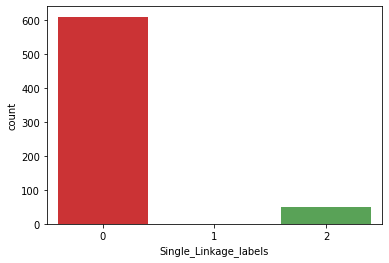

In [35]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels1 = pd.DataFrame(Cluster1.labels_, columns = list(['Single_Linkage_labels']))
labels1.index =labels1.index+1
labels1['Single_Linkage_labels'] = labels1['Single_Linkage_labels'].astype('category')
# Joining the labels1 dataframe with the original dataframe (appending the prediction)
data_labeled1 = data.join(labels1)
datascaled_labeled1 = datascaled.join(labels1)
sns.countplot(data_labeled1['Single_Linkage_labels'],palette='Set1');
print(data_labeled1['Single_Linkage_labels'].value_counts())

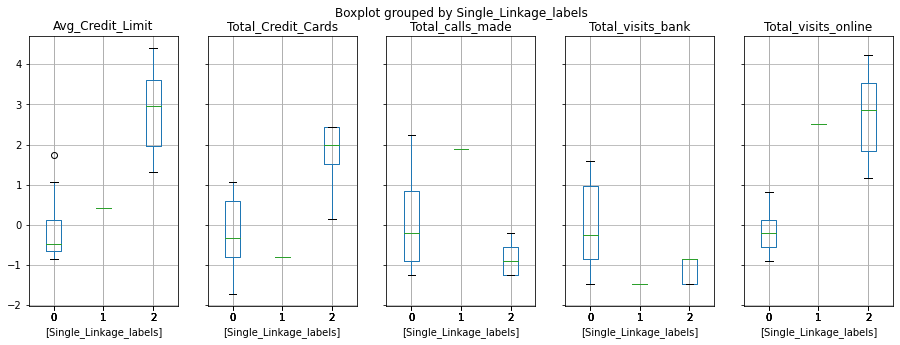

In [36]:
datascaled_labeled1.boxplot(by='Single_Linkage_labels', layout = (1,5),figsize=(15,5));

#### COMPLETE LINKAGE

In [37]:
Cluster2= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
Cluster2.fit(datascaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

0    397
2    213
1     50
Name: Complete_Linkage_labels, dtype: int64


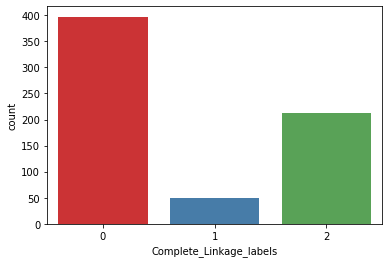

In [38]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels2 = pd.DataFrame(Cluster2.labels_, columns = list(['Complete_Linkage_labels']))
labels2.index =labels2.index+1
labels2['Complete_Linkage_labels'] = labels2['Complete_Linkage_labels'].astype('category')
# Joining the labels2 dataframe with the original dataframe (appending the prediction)
data_labeled2 = data.join(labels2)
datascaled_labeled2 = datascaled.join(labels2)
sns.countplot(data_labeled2['Complete_Linkage_labels'],palette='Set1');
print(data_labeled2['Complete_Linkage_labels'].value_counts())

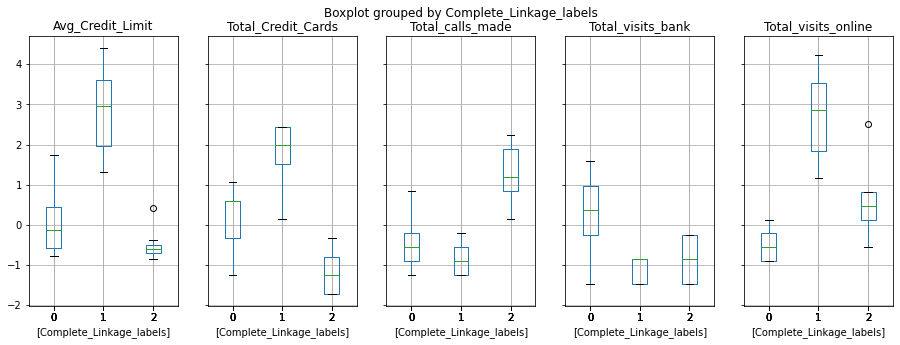

In [39]:
datascaled_labeled2.boxplot(by='Complete_Linkage_labels', layout = (1,5),figsize=(15,5));

#### AVERAGE LINKAGE

In [40]:
Cluster3= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
Cluster3.fit(datascaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

0    387
2    223
1     50
Name: Average_Linkage_labels, dtype: int64


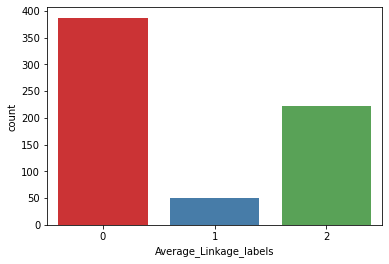

In [41]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels3 = pd.DataFrame(Cluster3.labels_, columns = list(['Average_Linkage_labels']))
labels3.index =labels3.index+1
labels3['Average_Linkage_labels'] = labels3['Average_Linkage_labels'].astype('category')
# Joining the labels3 dataframe with the original dataframe (appending the prediction)
data_labeled3 = data.join(labels3)
datascaled_labeled3 = datascaled.join(labels3)
sns.countplot(data_labeled3['Average_Linkage_labels'],palette='Set1');
print(data_labeled3['Average_Linkage_labels'].value_counts())

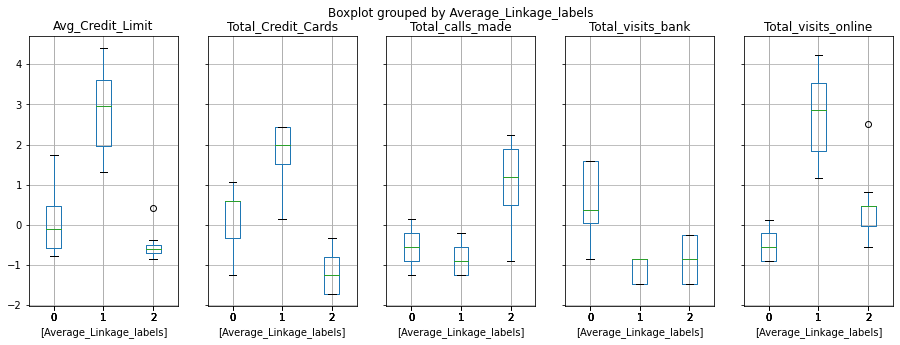

In [42]:
datascaled_labeled3.boxplot(by='Average_Linkage_labels', layout = (1,5),figsize=(15,5));

#### WARD LINKAGE

In [43]:
Cluster4= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Cluster4.fit(datascaled)

AgglomerativeClustering(n_clusters=3)

0    385
1    225
2     50
Name: Ward_Linkage_labels, dtype: int64


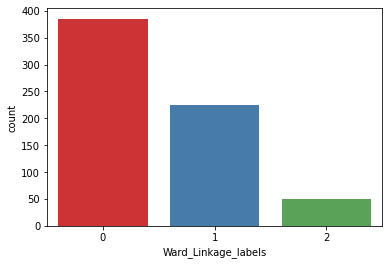

In [44]:
# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
labels4 = pd.DataFrame(Cluster4.labels_, columns = list(['Ward_Linkage_labels']))
labels4.index =labels4.index+1
labels4['Ward_Linkage_labels'] = labels4['Ward_Linkage_labels'].astype('category')
# Joining the labels4 dataframe with the original dataframe (appending the prediction)
data_labeled4 = data.join(labels4)
datascaled_labeled4 = datascaled.join(labels4)
sns.countplot(data_labeled4['Ward_Linkage_labels'],palette='Set1');
print(data_labeled4['Ward_Linkage_labels'].value_counts())

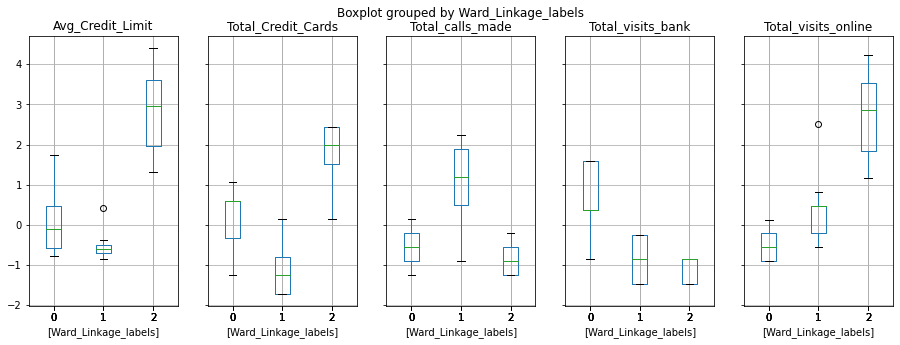

In [45]:
datascaled_labeled4.boxplot(by='Ward_Linkage_labels', layout = (1,5),figsize=(15,5));

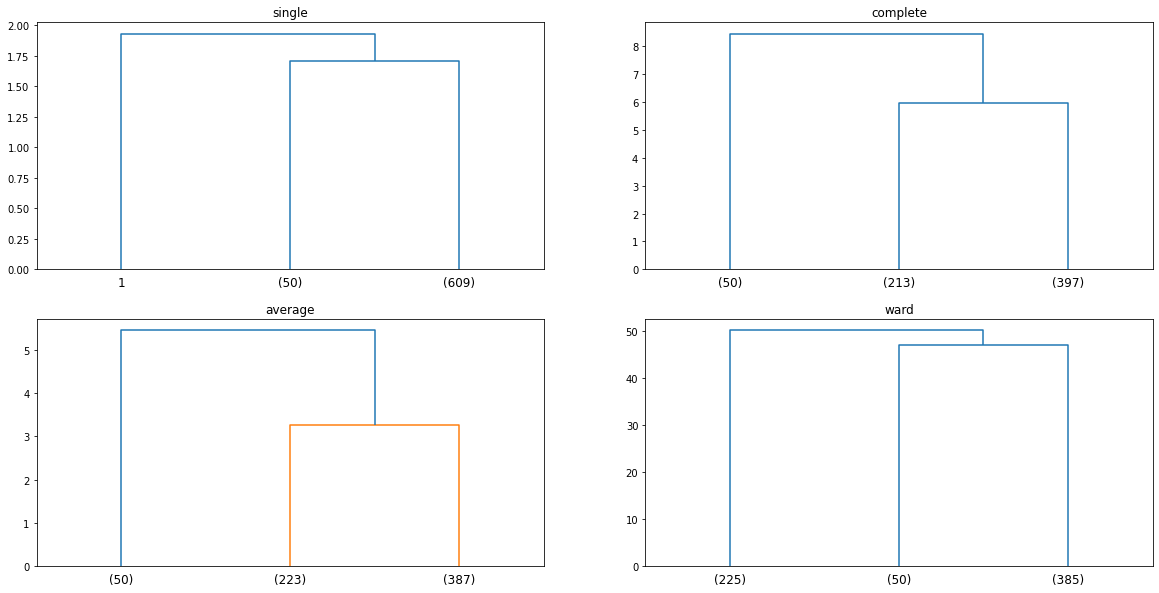

In [46]:
# Visualizing hierarchical clusters formed using truncate_mode ='lastp' attribute in dendrograms (p=3)
plt.figure(figsize= (20,10))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['single','complete','average','ward']:
    Z = linkage(datascaled,method=i, metric='euclidean')
    plt.subplot(2,2, pos)
    plt.title(i)
    dendrogram(Z,truncate_mode='lastp',p=3)  
    pos+= 1

<span style= font-size:3.5;> 
<font color=darkblue>
**INSIGHTS**
    
* As it can be seen from **countplots, boxplots and truncated dendrograms** shown above, with the exception of clusters built using single linkage, in general **Hierarchical Clustering** method show very similar results to those obtained with the **K-means** method. In this regard, based on cophenetic index, using **avarage linkage** might be considered as the most appropriate approach (best correlation between the Euclidian Distance and the Dendrogramic Distance).

## 5.  AVERAGE SILHOUETTE SCORE FOR BOTH K-MEANS & HIERARCHICAL CLUSTERING MODELS

In [47]:
from sklearn.metrics import silhouette_score
# K-MEANS CLUSTERING MODEL
Kmeans_silh_score=silhouette_score(datascaled,kmeans.labels_).round(3)

# HIERARCHICAL CLUSTERING MODEL USING SINGLE LINKAGE
Single_silh_score=silhouette_score(datascaled,Cluster1.labels_).round(3)

# HIERARCHICAL CLOSTERING MODEL USING COMPLETE LINKAGE
Complete_silh_score=silhouette_score(datascaled,Cluster2.labels_).round(3)

# HIERARCHICAL CLOSTERING MODEL USING AVERAGE LINKAGE
Average_silh_score=silhouette_score(datascaled,Cluster3.labels_).round(3)

# HIERARCHICAL CLOSTERING MODEL USING WARD LINKAGE
Ward_silh_score=silhouette_score(datascaled,Cluster4.labels_).round(3)

print ('K-MEANS CLUSTERING MODEL SILHOUETTE SCORE-------------------------->',Kmeans_silh_score)
print ('')
print ('HIERARCHICAL CLUSTERING MODEL-SINGLE LINKAGE SILHOUETTE SCORE------>',Single_silh_score)
print ('HIERARCHICAL CLUSTERING MODEL-COMPLETE LINKAGE SILHOUETTE SCORE---->',Complete_silh_score)
print ('HIERARCHICAL CLUSTERING MODEL-AVARAGE LINKAGE SILHOUETTE SCORE----->',Average_silh_score)
print ('HIERARCHICAL CLUSTERING MODEL-WARD LINKAGE SILHOUETTE SCORE-------->',Ward_silh_score)

K-MEANS CLUSTERING MODEL SILHOUETTE SCORE--------------------------> 0.516

HIERARCHICAL CLUSTERING MODEL-SINGLE LINKAGE SILHOUETTE SCORE------> 0.374
HIERARCHICAL CLUSTERING MODEL-COMPLETE LINKAGE SILHOUETTE SCORE----> 0.503
HIERARCHICAL CLUSTERING MODEL-AVARAGE LINKAGE SILHOUETTE SCORE-----> 0.516
HIERARCHICAL CLUSTERING MODEL-WARD LINKAGE SILHOUETTE SCORE--------> 0.515


<span style= font-size:1.5;> 
<font color=darkblue>
* **Silhouette score** refers to a method of interpretation and validation of consistency within clusters of data. This index  measures how similar a data point is to its own cluster compared to other clusters. 

* A silhouette score closer to 1 should indicate good cohesion within clusters and good separation between clusters, and a score of -1 should indicate the opposite.
    
* Based on prior statements, it is fairly noticed that **Hierarchical Clustering using average linkage and K-means clustering** models have similar performance on clustering the dataset, with an aceptable positive Silhouette score.

## PRINCIPAL COMPONENT ANALYSIS (PCA)

<span style= font-size:1.5;> 
<font color=darkblue>
Since clustering algorithms tend to be more efficient with a small number of dimensions, we are going to perform Principal Components Analysis to create clusters in a better way by reducing the dimension of original dataset.

In [48]:
import copy
data2 = copy.deepcopy(data) # copy of original dataset
data2.drop ('Customer Key',axis=1, inplace = True)
datascaled2=data2.apply(zscore) # scaling the data using z-score

In [49]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(datascaled2.T) # relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00151745  0.60978441 -0.10046453  0.55222122 -0.41498065]
 [ 0.60978441  1.00151745  0.31627526  0.16801286 -0.65223974]
 [-0.10046453  0.31627526  1.00151745 -0.55269882 -0.50678371]
 [ 0.55222122  0.16801286 -0.55269882  1.00151745  0.12749255]
 [-0.41498065 -0.65223974 -0.50678371  0.12749255  1.00151745]]
Eigenvectors 
[[ 0.48885901  0.40323959  0.70933671 -0.30861651 -0.00346147]
 [ 0.59767943  0.03017103 -0.10512237  0.74135216  0.28498293]
 [ 0.28049227 -0.58658661 -0.05058609 -0.44527763  0.6135219 ]
 [ 0.11178284  0.66516108 -0.59220036 -0.31838769  0.3049481 ]
 [-0.55912866  0.22352726  0.36404738  0.23560546  0.67035086]]

Eigenvalues 
[2.29029906 1.87416377 0.24430569 0.27826563 0.3205531 ]


Cumulative Variance Explained [ 45.73657824  83.16306089  89.56440906  95.12128938 100.        ]


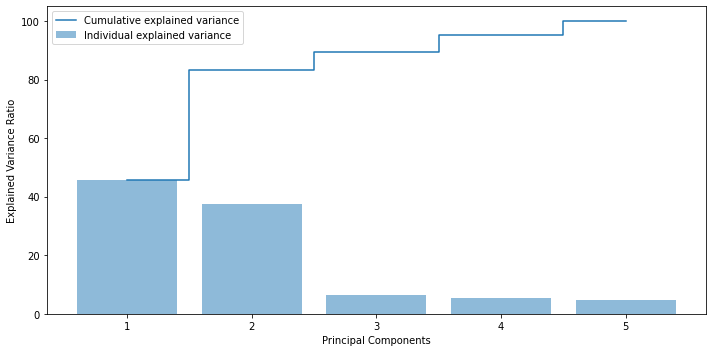

In [50]:
# Cumulative Variance Explained Analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [51]:
# generating dimensionally reduced dataset

eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

w = np.hstack((eigen_pairs[0][1].reshape(5,1),eigen_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', w)
data_pca = datascaled2.dot(w)

Matrix W:
 [[ 0.48885901  0.40323959]
 [ 0.59767943  0.03017103]
 [ 0.28049227 -0.58658661]
 [ 0.11178284  0.66516108]
 [-0.55912866  0.22352726]]


In [52]:
datascaled2.shape, w.shape, data_pca.shape

((660, 5), (5, 2), (660, 2))

0    386
1    224
2     50
Name: Kmeans_pca_labels, dtype: int64



K-MEANS CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ----> 0.683


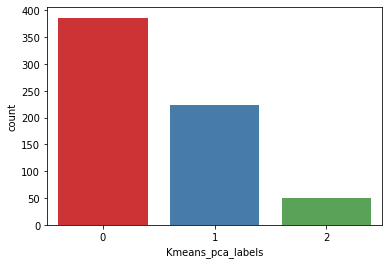

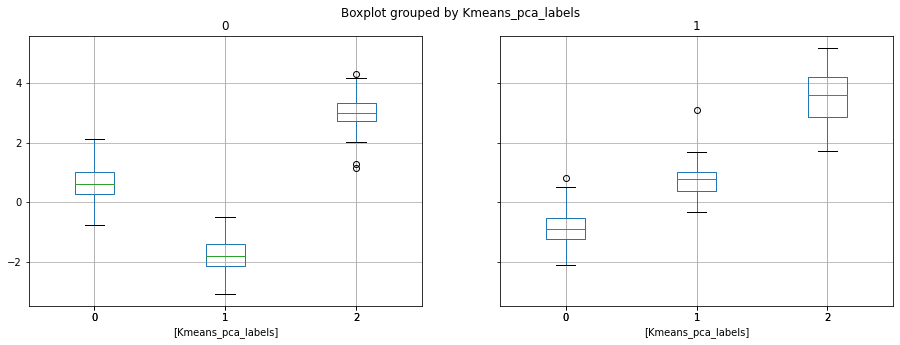

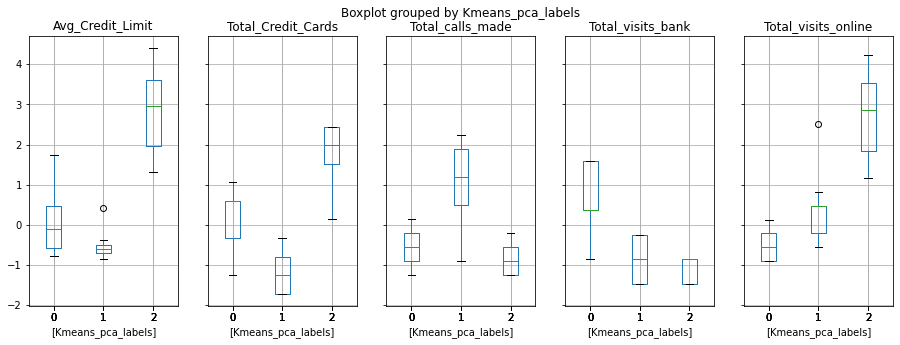

In [53]:
# K-MEANS CLUSTERING
kmeans2 = KMeans(n_clusters=3,n_init =15,random_state=85)
kmeans2.fit(data_pca)

# Creating a new dataframe only for labels and converting it into categorical variable
kmeans_labels1 = pd.DataFrame(kmeans2.labels_ , columns = list(['Kmeans_pca_labels']))
kmeans_labels1.index = kmeans_labels1.index+1
kmeans_labels1['Kmeans_pca_labels'] = kmeans_labels1['Kmeans_pca_labels'].astype('category')

# Joining the data_pca_labels dataframe with the original dataframe (appending the prediction)
data_pca_labeled1 = data_pca.join(kmeans_labels1)
data_pca_labeled11 = (data.drop('Customer Key',axis=1).apply(zscore)).join(kmeans_labels1)

# Countplot to visualize distribution of data points among the groups
sns.countplot(data_pca_labeled1['Kmeans_pca_labels'],palette='Set1');
print(data_pca_labeled1['Kmeans_pca_labels'].value_counts())
print ('')

# Using boxplot to analyze the distribution of the data with dimensionality reduction among the groups
data_pca_labeled1.boxplot(by='Kmeans_pca_labels', layout = (1,2),figsize=(15,5));
print ('')

# Using boxplot to analyze the distribution of the data without dimensionality reduction among the groups
data_pca_labeled11.boxplot(by='Kmeans_pca_labels', layout = (1,5),figsize=(15,5));
print ('')

# Average Silhouette score
Kmeans2_silh_score=silhouette_score(data_pca,kmeans2.labels_).round(3)
print ('K-MEANS CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ---->',Kmeans2_silh_score)

<span style= font-size:1.5;> 
<font color=darkblue>
* After performing dimensionality reduction by means of PCA, K-means clustering increses the Silhouette score, getting well differentiated clusters between each of the attributes as observed in boxplots above, quite similiar to those obtained before applying PCA.


2    386
0    224
1     50
Name: Hierar_pca_labels, dtype: int64



HIERARCHICAL CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ----> 0.682


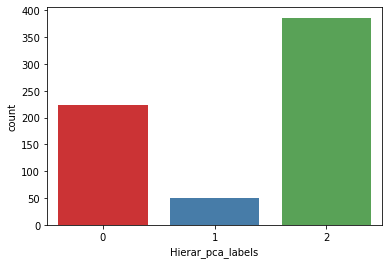

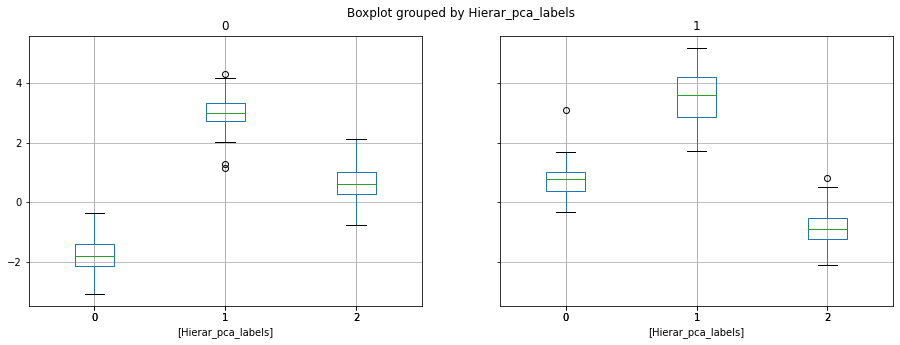

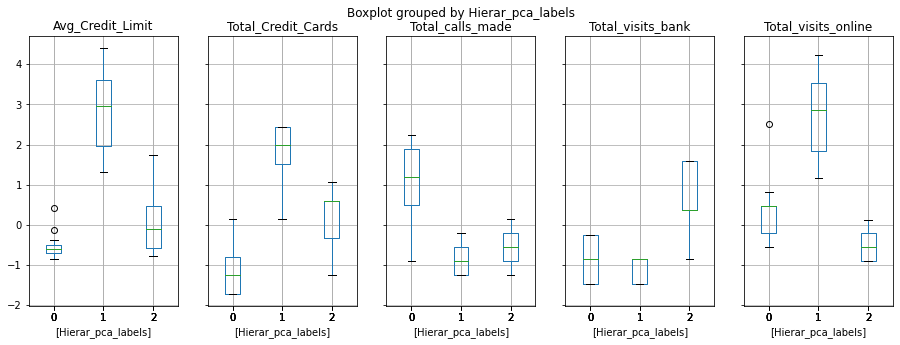

In [54]:
# HIERARCHICAL CLUSTERING USING AVERAGE LINKAGE
Hierarchical_Clusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
Hierarchical_Clusters.fit(data_pca)

# Creating a new dataframe only for labels obtained from hierarquical clustering and converting it into categorical variable
Hierarchical_labels1 = pd.DataFrame(Hierarchical_Clusters.labels_, columns = list(['Hierar_pca_labels']))
Hierarchical_labels1.index =Hierarchical_labels1.index+1
Hierarchical_labels1['Hierar_pca_labels'] = Hierarchical_labels1['Hierar_pca_labels'].astype('category')

# Joining the Hierarchical_labels dataframe with the original dataframe (appending the prediction)
data_pca_labeled2 = data_pca.join(Hierarchical_labels1)
data_pca_labeled21 = (data.drop('Customer Key',axis=1).apply(zscore)).join(Hierarchical_labels1)

# Countplot to visualize distribution of data points among the groups
sns.countplot(data_pca_labeled2['Hierar_pca_labels'],palette='Set1');
print(data_pca_labeled2['Hierar_pca_labels'].value_counts())
print ('')

# Using boxplot to analyze the distribution of the data with dimensionality reduction among the groups
data_pca_labeled2.boxplot(by='Hierar_pca_labels', layout = (1,2),figsize=(15,5));
print ('')

# Using boxplot to analyze the distribution of the data without dimensionality reduction among the groups
data_pca_labeled21.boxplot(by='Hierar_pca_labels', layout = (1,5),figsize=(15,5));
print ('')

# Average Silhouette score
Hierarchical_Clusters_silh_score=silhouette_score(data_pca,Hierarchical_Clusters.labels_).round(3)
print ('HIERARCHICAL CLUSTERING MODEL SILHOUETTE SCORE AFTER PCA ---->',Hierarchical_Clusters_silh_score)

<span style= font-size:1.5;> 
<font color=darkblue>
**INSIGHTS**
    
After applying PCA, the benefit is noticeable. By reducing to only two dimensions (which explains 83% of the variation of the data), a better performance of both **K-means and Hierarchical clustering** was obtained, increasing the value of the **Average Silhouette score up to 0.68**. Besides this, by removing multi-coliniarity improves the performance of the models and reduces computational times.

## 6. COMPARING K-MEANS CLUSTERS WITH HIERARCHICAL CLUSTERS

In [55]:
# Recaling Average Silhouette Score of Different clusters built

score_columns = ['Clustering Model','Silhouette score']
score_compare = pd.DataFrame(columns=score_columns)
row_index = 0

score_compare.loc[row_index,'Clustering Model'] = 'K-means Clusters'
score_compare.loc[row_index,'Silhouette score'] = Kmeans_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierarchical Cluster - Single Linkage'
score_compare.loc[row_index,'Silhouette score'] = Single_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] =  'Hierarchical Cluster - Complete Linkage'
score_compare.loc[row_index,'Silhouette score'] = Complete_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierarchical Cluster - Average Linkage'
score_compare.loc[row_index,'Silhouette score'] = Average_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierarchical Cluster - Ward Linkage'
score_compare.loc[row_index,'Silhouette score'] = Ward_silh_score
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'K-means Clusters - after PCA'
score_compare.loc[row_index,'Silhouette score'] = Kmeans2_silh_score 
row_index += 1
score_compare.loc[row_index,'Clustering Model'] = 'Hierar. Cluster - Average Linkage - after PCA'
score_compare.loc[row_index,'Silhouette score'] = Hierarchical_Clusters_silh_score


display(score_compare)

,Clustering Model,Silhouette score
0,K-means Clusters,0.516
1,Hierarchical Cluster - Single Linkage,0.374
2,Hierarchical Cluster - Complete Linkage,0.503
3,Hierarchical Cluster - Average Linkage,0.516
4,Hierarchical Cluster - Ward Linkage,0.515
5,K-means Clusters - after PCA,0.683
6,Hierar. Cluster - Average Linkage - after PCA,0.682


In [56]:
#  Distribution of the data among the clusters built with K-means and Hierarchical Clustering
# K-MEANS
print ('K-MEANS CLUSTERING')
print ('')
df_labeled = data.join(kmeans_labels1)
data_clust1 = df_labeled.drop('Customer Key',axis=1).groupby(['Kmeans_pca_labels'])
data_clust1.mean().round()

K-MEANS CLUSTERING



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmeans_pca_labels,,,,,
0,33782.0,6.0,3.0,1.0,2.0
1,12174.0,2.0,1.0,4.0,7.0
2,141040.0,9.0,1.0,11.0,1.0


In [57]:
# HIERARCHICAL CLUSTERING - AVERAGE LINKAGE
print ('HIERARCHICAL CLUSTERING - AVERAGE LINKAGE')
print ('')
df_labeled2 = data.join(Hierarchical_labels1)
data_clust2 = df_labeled2.drop('Customer Key',axis=1).groupby(['Hierar_pca_labels'])
data_clust2.mean().round()

HIERARCHICAL CLUSTERING - AVERAGE LINKAGE



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Hierar_pca_labels,,,,,
0,12277.0,2.0,1.0,4.0,7.0
1,141040.0,9.0,1.0,11.0,1.0
2,33723.0,6.0,3.0,1.0,2.0


In [58]:
# Mutual Information between clusterings
from sklearn.metrics import mutual_info_score
print(mutual_info_score (kmeans2.labels_,Hierarchical_Clusters.labels_).round(3))
# Mutual Information is a measure of the similarity between two labels of the same data

0.856


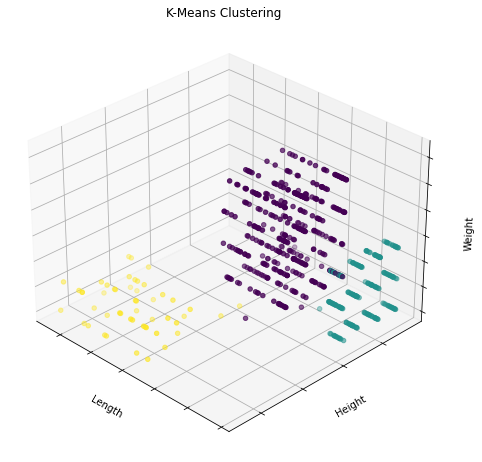

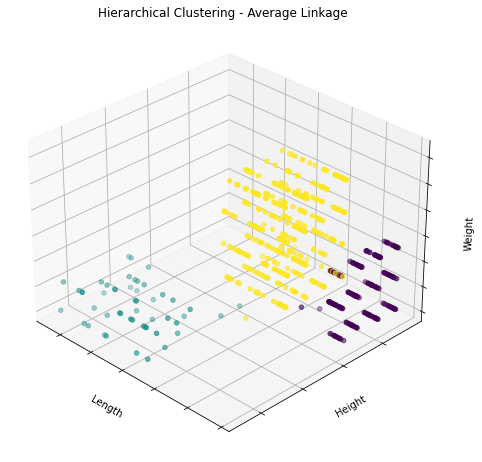

In [59]:
# 3D PLOT OF CLUSTERS 
from mpl_toolkits.mplot3d import Axes3D

# K-MEANS CLUSTERING

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=30, azim=135)
ax.scatter(datascaled.iloc[:, 0], datascaled.iloc[:, 1], datascaled.iloc[:, 2],c=kmeans2.labels_.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('K-Means Clustering');

# K- HIERARCHICAL CLUSTERING - AVERAGE LINKAGE

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=30, azim=135)
ax.scatter(datascaled.iloc[:, 0], datascaled.iloc[:, 1], datascaled.iloc[:, 2],c=Hierarchical_Clusters.labels_.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('Hierarchical Clustering - Average Linkage');

<span style= font-size:1.5;> 
<font color=darkblue>
**INSIGHTS**
    
* As mentioned before, based on the **Silhouette Score** of the different models built, it is noticed that for this problem, **Hierarchical Clustering using average linkage and K-means clustering models** have better performance on clustering the dataset (closely followed by ward linkage), with an aceptable positive Silhouette score. In this regard, Hierarchical clustering using single linkage have the lowest performance, which is somehow expected based on the cophenet indexs obtained before.

* After applying PCA for dimensionality reduction, a better performance of both K-means and Hierarchical clustering was achieved, increasing the value of the **Average Silhouette score up to 0.68**.

* When analyzing the distribution of the data among the clusters built with K-means and Hierarchical Clustering (with the exception of single linkage), the results show well differentiated clusters between each of the attributes, with similar results when comparing mean of the ditribution of the groups within each variable.
    
* The mutual information score (measure of the similarity between two labels of the same data) obtained between K-means and Hierarchical Clustering using average linkage is about 0.86, which confirmed the prior statements.  

* With regard the computational cost of each model (fit time), for K-means it is clear noticed that the fit time is inversely proportional to the number of clusters, while, for Hierarchical clustering this relationship seems to be random.

## 7. ANALYSIS OF THE CLUSTERS FORMED

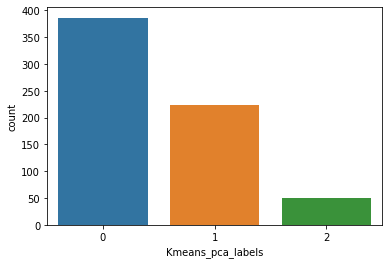

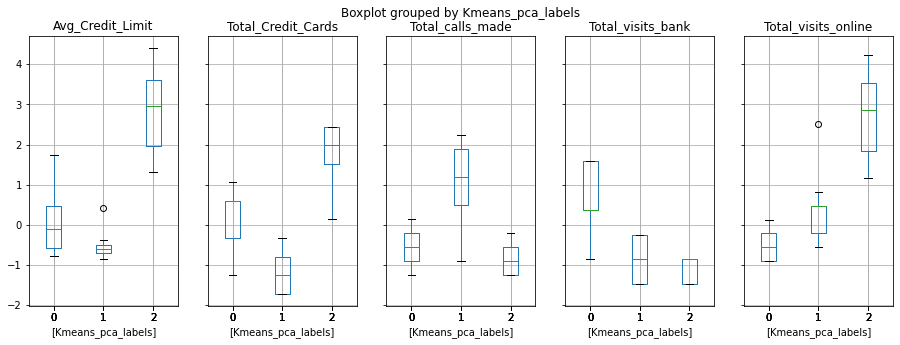

In [60]:
# Recalling counplot and boxplots to analyze the distribution of the data 
# on each attribute among the clusters formed using K-means clustering:
sns.countplot(data_pca_labeled1['Kmeans_pca_labels']);
data_pca_labeled11.boxplot(by='Kmeans_pca_labels', layout = (1,5),figsize=(15,5));

In [61]:
# STATISTICAL SUMMARY ABOUT SPENDING PATTERNS
data_clust1 ['Avg_Credit_Limit','Total_Credit_Cards'].describe().T.round(2)

Kmeans_pca_labels                 0         1          2
Avg_Credit_Limit   count     386.00    224.00      50.00
                   mean    33782.38  12174.11  141040.00
                   std     22169.46   5249.05   34457.88
                   min      5000.00   3000.00   84000.00
                   25%     13000.00   8000.00  108750.00
                   50%     31000.00  12000.00  145500.00
                   75%     52000.00  16000.00  170000.00
                   max    100000.00  50000.00  200000.00
Total_Credit_Cards count     386.00    224.00      50.00
                   mean        5.52      2.41       8.74
                   std         1.14      1.10       1.27
                   min         2.00      1.00       5.00
                   25%         4.00      1.00       8.00
                   50%         6.00      2.00       9.00
                   75%         6.00      3.00      10.00
                   max         7.00      4.00      10.00

In [62]:
# STATISTICAL SUMMARY ABOUT INTERACTION WITH THE BANK.
data_clust1 ['Total_calls_made','Total_visits_bank','Total_visits_online'].describe().T.round(2)

Kmeans_pca_labels               0       1      2
Total_calls_made    count  386.00  224.00  50.00
                    mean     2.00    6.87   1.08
                    std      1.43    1.99   0.88
                    min      0.00    1.00   0.00
                    25%      1.00    5.00   0.00
                    50%      2.00    7.00   1.00
                    75%      3.00    9.00   2.00
                    max      4.00   10.00   3.00
Total_visits_bank   count  386.00  224.00  50.00
                    mean     3.49    0.93   0.60
                    std      1.14    0.80   0.49
                    min      1.00    0.00   0.00
                    25%      3.00    0.00   0.00
                    50%      3.00    1.00   1.00
                    75%      5.00    2.00   1.00
                    max      5.00    2.00   1.00
Total_visits_online count  386.00  224.00  50.00
                    mean     0.98    3.55  10.90
                    std      0.86    1.22   2.88
                    min      0.00    1.00   6.00
                    25%      0.00    2.00   8.00
                    50%      1.00    4.00  11.00
                    75%      2.00    4.00  13.00
                    max      3.00   10.00  15.00

 ## KEY QUESTIONS

**1. HOW MANY DIFFERENT SEGMENTS OF CUSTOMERS ARE THERE?**
<span style= font-size:1.5;> 
<font color=darkblue>
* As mentioned before, based on 'Elbow' method and the 'Average Silhouette Coefficient', it is concluded that for this problem, the suitable number of segments of customers (clusters) are **3**.

In [65]:
# visualizer = KElbowVisualizer(kmeans2, k=(2,10), metric='distortion',timings=False,locate_elbow=True)
# visualizer.fit(datascaled)    
# visualizer.show();

In [64]:
# visualizer = KElbowVisualizer(kmeans2, k=(2,10), metric='silhouette',timings=False,locate_elbow=True)
# visualizer.fit(datascaled)    
# visualizer.show();

**2. HOW ARE THESE SEGMENTS DIFFERENT FROM EACH OTHER?**
<span style= font-size:1.5;> 
<font color=darkblue>

Based on clusters obtained using K-Means Clustering:
    

* Customers within first segment (group labeled 0) represent the bank's average clientele (about 58% of whole clientesle). This group of clients have a average credit limit around 33782 and a median of 6 credit cards. Customers of this group tend to visit the bank more often instead of using online services nor phone calls.
    
    
* Customers within second segment (group labeled 1) might be consired as clients with the lowest spending. Their mean credit limit is less than half of the bank's average clientele. Customers of this group have a median of 2 credit cards and they ussually interact more with the bank by means of phone calls. Customers within this group represent approximately 34% of total bank's clientele.
    
* Segment with the fewest observations (group labeled 2) corresponds to customers with the highest spending pattern. This behavior is clearly observed when looking at the mean of credit limits (around 141040), almost four time more than the  bank's average clientele. Customers within this group have a median of 9 credit cards and they prefer using online services ofered by the bank. This group represent about 7.5% of total bank's clientele.

**3. RECOMMENDATIONS TO THE BANK ON HOE TO BETTER MARKET AND SERVICE THESE CUSTOMERS?**
<span style= font-size:1.5;> 
<font color=darkblue>
  
Rergarding support services perceived by customers:
    
* Since the bank's average clientele (represented in group 0) still prefer to carry out financial requests and transactions directly at the bank's offices, it is recommended to unify the user experience across all the offices. Clients might expect a satisfactory and consistent customer experience at each office. One of the end goals should be to ensure that all communication channels provide the exact same offer and functionalities. More important, a better customer experience can be as simple as knowledgeable bank employees. A proper training of employees in the bank offices to quick address issues and answers to customer questions.
    
* A second approach might be to embrace online banking technology. Concerns regarding privacy and security are among most common reasons why customers hesitate to use modern remote banking solutions. This means that implementing proper safety measures and keeping the client informed about them should be a priority. The bank should strive to move even the most complex of their services to online/mobile channels.
    
    
 Regarding developing campaigns to target new customers as well as upsell to existing customers:

 * Since Bank's average clientele are those customers who visit the bank more frequently, advertising of credit facilities in the bank's offices can be address, aim to customers with average spending patterns. This strategy of marketing can include promoter employees in charge of improve customer's experience and at the same time trained to offering credits opportunities.

 * For segment of customers with highest expending patters, which also use more online services, the bank can considerer to track and address individual customer preferences and feedbacks on bank's products, to devolope personailized offers of credits with higher rewards and special perks.
    
 *  For segment of customers with lowest expending, the bank can offer several plans to make major purchases within a period of several months where customers pay no interest or have a reduced rate. These customers are more suitable to contact by phone calls.